In [5]:
from diff_eqn import *
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [6]:
from Root_find_lib import *

In [7]:
def CosmoBoltzSolver(k,step=0.01):
    h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h
    H= lambda a: H0*np.sqrt(Om/a**3+Or/a**4+Ol+(1-Om-Or-Ol)/a**2)
    RHS=[lambda Y,lna:-2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2)-k*Y[4]/(np.exp(lna)**1*H(np.exp(lna))),
     lambda Y,lna: 2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)-(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]+H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: -k/(np.exp(lna)**1*H(np.exp(lna)))*Y[1]-Y[2],
     lambda Y,lna:-6*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(3+k**2/(1*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-k*Y[2]/(np.exp(lna)**1*H(np.exp(lna)))-3*H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]
    lna0=-20
    Y0=[[1/3],[1],[0],[1],[0]]
    sol=RK4_solve_system(RHS,lna0,Y0,step,int(20/step))
    return(sol)
    

In [5]:
sol1=CosmoBoltzSolver(200,step=0.01)

In [6]:
sol2=CosmoBoltzSolver(2000,step=0.001)

In [7]:
sol3=CosmoBoltzSolver(20000,step=0.0001)

In [8]:
sol4=CosmoBoltzSolver(200000,step=0.0001)

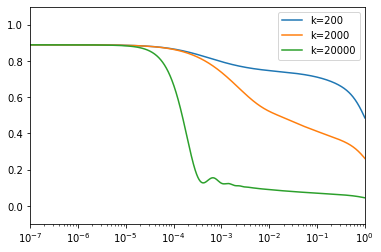

In [10]:
plt.plot(np.exp(sol1[-1]),sol1[1],label='k=200')
plt.plot(np.exp(sol2[-1]),sol2[1],label='k=2000')
plt.plot(np.exp(sol3[-1]),sol3[1],label='k=20000')
plt.plot(np.exp(sol4[-1]),sol4[1],label='k=200000')
plt.ylim(-0.1,1.1)
plt.xlim(1e-7,1)
plt.xscale('log')
plt.legend()

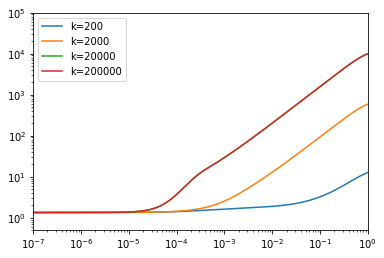

In [11]:
plt.plot(np.exp(sol1[-1]),sol1[3],label='k=200')
plt.plot(np.exp(sol2[-1]),sol2[3],label='k=2000')
plt.plot(np.exp(sol3[-1]),sol3[3],label='k=20000')
plt.plot(np.exp(sol4[-1]),sol4[3],label='k=200000')
plt.ylim(0.5,1e+5)
plt.xlim(1e-7,1)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [8]:
from scipy.integrate import BDF

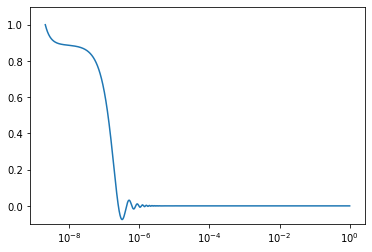

In [25]:
k=20000000
def f(lna,Y):
  h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h
  H= lambda a: H0*np.sqrt(Om/a**3+Or/a**4+Ol+(1-Om-Or-Ol)/a**2)
  RHS=[-2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2)-k*Y[4]/(np.exp(lna)**1*H(np.exp(lna))),
    2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)-(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]+H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
    -k/(np.exp(lna)**1*H(np.exp(lna)))*Y[1]-Y[2],
    -6*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(3+k**2/(1*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-k*Y[2]/(np.exp(lna)**1*H(np.exp(lna)))-3*H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
    k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]
  return(RHS)


sol=BDF(f,-20,[1/3,1,0,1,0],0,max_step=0.01)


tim=[]
soln=[]
while True:
    sol.step()
    tim.append(sol.t)
    soln.append(sol.y)
    if sol.status=='finished':
        break

soln=np.array(soln)

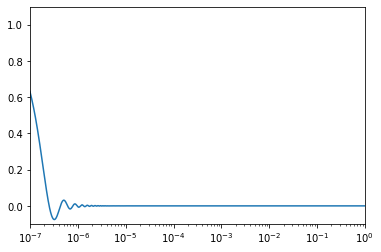

In [32]:
plt.plot(np.exp(tim),soln[:,1])
plt.ylim(-0.1,1.1)
plt.xlim(1e-7,1)
plt.xscale('log')

In [30]:
tim[0]

-19.999416019858923

In [31]:
np.exp(-20)

2.061153622438558e-09

In [ ]:
#f(Y)

In [5]:
def Jacobian(f,x0,h=1e-2):
    A=np.empty((len(f),len(f)))
    for i in range(len(f)):
        for j in range(len(f)):
            temp1=x0;temp2=x0
            temp1[i]=temp1[i]+h;temp2[i]=temp2[i]-h
            A[i,j]=(f[j](temp1)-f[j](temp2))/(2*h)
    return(A.T)


In [6]:
def NRSystem(f,x0,err=1e-2):
    x=x0-np.dot(np.linalg.inv(Jacobian(f,x0)),f(x0))
    while True:
        x_bef=x
        x=x-np.dot(np.linalg.inv(Jacobian(f,x)),f(x))
        if np.sum((x_bef-x)**2)<err:
            return(x)


In [7]:
def BDF2(f,x0,y0,h=1e-2,Max=100):
    sol=np.empty((Max+1,len(f)+1))
    sol[0,-1]=x0;sol[0,:-1]=y0
    for i in range(1,Max+1):
        sol[i,-1]=sol[i-1,-1]+h
        sol[i,:-1]=NRSystem([lambda ynr: ynr-sol[i-1,j]-h*f[j](y0,x0) for j in range(len(f))],sol[i-1,:-1])
    return(sol)

In [8]:
k=20000000
h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h
H= lambda a: H0*np.sqrt(Om/a**3+Or/a**4+Ol+(1-Om-Or-Ol)/a**2)
RHS=[lambda Y,lna:-2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2)-k*Y[4]/(np.exp(lna)**1*H(np.exp(lna))),
     lambda Y,lna: 2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)-(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]+H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: -k/(np.exp(lna)**1*H(np.exp(lna)))*Y[1]-Y[2],
     lambda Y,lna:-6*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(3+k**2/(1*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-k*Y[2]/(np.exp(lna)**1*H(np.exp(lna)))-3*H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]

In [9]:
sol5=BDF2(RHS,-20,[1/3,1,0,1,0],h=0.01,Max=200)

In [ ]:
plt.plot(np.exp(sol[:,-1]),sol[:,1])
plt.xscale('log')
plt.ylim(-0.1,1.1)
plt.xlim(1e-7,1)
plt.xscale('log')